In [115]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df=pd.read_csv('covid_19_clean_complete.csv')

In [117]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [119]:
df=df.drop(columns='Province/State')

In [120]:
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [121]:
df.corr(numeric_only=True)

,Lat,Long,Confirmed,Deaths,Recovered,Active
Lat,1.000000,-0.127259,0.036665,0.070040,0.015329,0.044392
Long,-0.127259,1.000000,-0.078911,-0.101340,-0.052391,-0.085688
Confirmed,0.036665,-0.078911,1.000000,0.912361,0.895506,0.950255
Deaths,0.070040,-0.101340,0.912361,1.000000,0.763090,0.891858
Recovered,0.015329,-0.052391,0.895506,0.763090,1.000000,0.713088
Active,0.044392,-0.085688,0.950255,0.891858,0.713088,1.000000


In [122]:
df['Mortality_rate']=df['Deaths']/df['Confirmed']*100
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Mortality_rate
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,NaN
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,NaN
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,NaN
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,NaN
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,NaN
...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,1.618497
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,28.562980
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,1.977401
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,0.829302


In [123]:
total_deaths=df.groupby('Country/Region')['Deaths'].sum()
total_deaths

Country/Region
Afghanistan           49098
Albania                5708
Algeria               77972
Andorra                5423
Angola                 1078
                      ...  
West Bank and Gaza     1370
Western Sahara           63
Yemen                 17707
Zambia                 2643
Zimbabwe                881
Name: Deaths, Length: 187, dtype: int64

In [124]:
total_confirmed=df.groupby('Country/Region')['Confirmed'].sum()

In [125]:
total_confirmed

Country/Region
Afghanistan           1936390
Albania                196702
Algeria               1179755
Andorra                 94404
Angola                  22662
                       ...   
West Bank and Gaza     233461
Western Sahara            901
Yemen                   67180
Zambia                 129421
Zimbabwe                50794
Name: Confirmed, Length: 187, dtype: int64

In [126]:
Mortality_rate=total_deaths/total_confirmed *100
Mortality_rate

Country/Region
Afghanistan            2.535543
Albania                2.901852
Algeria                6.609169
Andorra                5.744460
Angola                 4.756862
                        ...    
West Bank and Gaza     0.586822
Western Sahara         6.992231
Yemen                 26.357547
Zambia                 2.042172
Zimbabwe               1.734457
Length: 187, dtype: float64

In [127]:
Mortality_rate.sort_values(ascending=False).head()

Country/Region
Yemen             26.357547
Belgium           15.342481
United Kingdom    14.945743
France            14.372423
Italy             13.863140
dtype: float64

These are the top countries with the highest mortality rate


In [128]:
df2=df[['Date','Recovered','Confirmed']]

In [129]:
df2

,Date,Recovered,Confirmed
0,2020-01-22,0,0
1,2020-01-22,0,0
2,2020-01-22,0,0
3,2020-01-22,0,0
4,2020-01-22,0,0
...,...,...,...
49063,2020-07-27,734,865
49064,2020-07-27,833,1691
49065,2020-07-27,328,354
49066,2020-07-27,6028,7235


In [130]:
df2['Date']=pd.to_datetime(df2['Date'])
df2=df2.groupby(df2['Date'].dt.strftime('%Y-%m'))[['Recovered','Confirmed']].sum()
df2

C:\Users\thenn\AppData\Local\Temp\ipykernel_15892\3450812011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date']=pd.to_datetime(df2['Date'])


,Recovered,Confirmed
Date,,
2020-01,838,38534
2020-02,363669,1663437
2020-03,2644372,9002815
2020-04,15944020,63391662
2020-05,52876838,144990399
2020-06,116984268,246525787
2020-07,199594224,362895848


Text(0.5, 0, 'Month Wise')

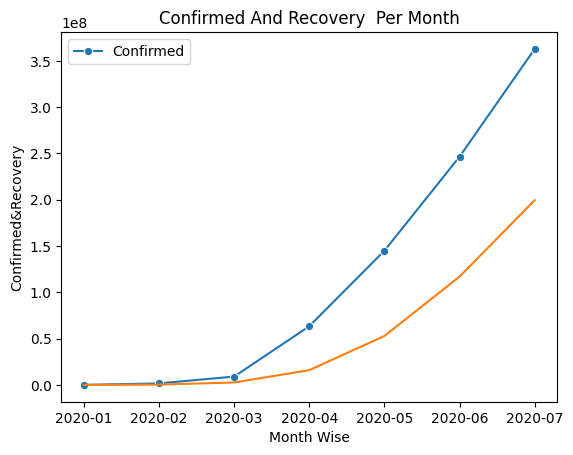

In [131]:
ax = sns.lineplot(
    x='Date', 
    y='Confirmed', 
    data=df2,
    marker='o',
    label='Confirmed',
)
plt.Figure(figsize=(15,8))
sns.lineplot(x='Date',y='Recovered',ax=ax,data=df2)
plt.ylabel('Confirmed&Recovery')
plt.title('Confirmed And Recovery  Per Month')
plt.xlabel('Month Wise')

From this graph,We can see that the virus is exponentially spreading by each month and with a good recovery rate